## DataFrame

<center><img src = "https://pynative.com/wp-content/uploads/2021/02/dataframe.png" alt="My Image"></center>

### 관계형 데이터
- 관계형 데이터는 데이터가 하나 이상의 열과 행의 테이블에 저장되어 서로 다른 데이터 구조가 어떻게 관련되어 있는지 쉽게 파악하고 이해할 수 있도록 사전 정의된 관계로 데이터를 구성하는 정보 모음이다
- 실제로 kaggle, Torch 등 수많은 데이터가 관계형 데이터로 저장이 되어있다
- Pandas의 Data Frame은 관계형 데이터를 저장하는데 효율적이고 알맞는 형식을 제공한다


### DataFrame 구조
- n * m 행렬구조를 가지는 데이터 구조이고 index와 column이 별도의 이름을 가진다. 
- column별로 다른 데이터 타입을 가질 수 있다

In [1]:
import pandas as pd
a = pd.DataFrame([[10,20,30], [40,50,60], [70,80,90]])
print(a) # print 사용시 문자열만을 사용해서 출력된다
print(type(a)) # pandas.core.frame.DataFrame
print(len(a))

    0   1   2
0  10  20  30
1  40  50  60
2  70  80  90
<class 'pandas.core.frame.DataFrame'>
3


In [2]:
a # 변수 호출만 하면 HTML형식으로 출력된다

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [63]:
data = [[10,20,30], [40,50,60], [70,80,90]]
a = pd.DataFrame(data, columns = ['1차','2차','3차'], index = ['One','Two','Three'])
a

,1차,2차,3차
One,10,20,30
Two,40,50,60
Three,70,80,90


### Column Indexing
- dataframe의 column단위로 정보 접근이 가능하다
- 출력은 pandas의 Series형태로 출력된다
- iloc과 loc을 통해서도 indexing이 가능하다

In [64]:
a['1차'] 

One      10
Two      40
Three    70
Name: 1차, dtype: int64

In [5]:
a['2차']

One      20
Two      50
Three    80
Name: 2차, dtype: int64

In [6]:
a[['1차','2차']] # 여러개의 행을 indexing하는것도 가능하다

,1차,2차
One,10,20
Two,40,50
Three,70,80


In [65]:
a.loc[:,'1차'] # loc에서 comma 뒤는 column의 위치이다

One      10
Two      40
Three    70
Name: 1차, dtype: int64

In [66]:
a.iloc[:,1] # iloc을 통해서도 column indexing이 가능하다

One      20
Two      50
Three    80
Name: 2차, dtype: int64

### Row Indexing
- dataframe은 열 단위로도 정보 접근이 가능하다
- loc method를 사용하면 열의 이름으로 접근이 가능하다
- iloc method를 사용하면 정수 인덱싱처럼 접근이 가능하다
- 데이터가 커지면 커질수록 중요한 접근방법이 된다

In [9]:
a.loc['One'] # 열의 이름으로 접근

1차    10
2차    20
3차    30
Name: One, dtype: int64

In [70]:
a.iloc[0:2, 0:2] # 정수인덱싱처럼 접근

,1차,2차
One,10,20
Two,40,50


### DataFrame 생성

<br>

<pre> class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)</pre>

<br>

Data Frame은 list, tuple, Dictionary, Series 등 다양한 방법으로 제작이 가능하다

In [71]:
# Our small data set
d = [0,1,2,3,4,5,6,7,8,9] # DataFrame은 기본적으로 column 단위로 데이터를 관리한다

# create dataframe
df = pd.DataFrame(d)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [12]:
names = ['Bob','Jessica','Mary','John','kate']
births = [988,155,77,578,973]
BabySet = list(zip(names, births)) # column단위로 리스트를 만들어서 zip을 이용해서 순서쌍을 만들고 데이터를 생성
df = pd.DataFrame(data = BabySet, columns = ['Names', 'Births'])
df

,Names,Births
0,Bob,988
1,Jessica,155
2,Mary,77
3,John,578
4,kate,973


In [13]:
names = ['Bob','Jessica','Mary','John','kate']
births = [988,155,77,578,973]
DicBabySet = {'Names' : names, 'Births' : births} # 사전을 이용해 제작
df = pd.DataFrame(data = DicBabySet)
df # 위의 것과 같은 결과를 출력한다

,Names,Births
0,Bob,988
1,Jessica,155
2,Mary,77
3,John,578
4,kate,973


In [14]:
area_dic = {'california' : 423967, 'Texas' : 695662, 'New York' : 141297, 
            'Florida' : 170312, 'Illinois' : 149995}
pop_dic = {'california' : 1423967, 'Texas' : 1695662, 'New York' : 1141297, 
            'Florida' : 1170312, 'Illinois' : 1149995}
area = pd.Series(area_dic) # Series를 이용해 Dataframe 제작
population = pd.Series(pop_dic) # 두 개의 series 타입에서 키값을 추출해서 자동으로 index화해서 처리

states = pd.DataFrame({'Population' : population, 'Area' : area})
states

,Population,Area
california,1423967,423967
Texas,1695662,695662
New York,1141297,141297
Florida,1170312,170312
Illinois,1149995,149995


In [15]:
states.index # Index

Index(['california', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [16]:
states.values # ndarray

array([[1423967,  423967],
       [1695662,  695662],
       [1141297,  141297],
       [1170312,  170312],
       [1149995,  149995]])

- dictionary를 통해 각 column에 대한 데이터를 저장한 후 dictionary를 DataFrame Class의 생성자 인자로 넘겨주면 DataFrame 객체가 생성된다

In [17]:
raw_data = {'col0' : [1,2,3,4],
            'col1' : [10,20,30,40],
            'col2' : [100,200,300,400]}

data = pd.DataFrame(raw_data)
print(data)

   col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400


raw_data dictionary는 'col0','col1','col2'라는 key 값을 가지며 각 key는 list타입의 value를 가진다

In [18]:
data['col0']

0    1
1    2
2    3
3    4
Name: col0, dtype: int64

DataFrame에는 3개의 Series 객체가 있고, 이는 'col0','col1','col2'라는 key를 통해 value에 해당하는 Series 객체에 접근할 수 있다

In [19]:
type(data['col0'])

pandas.core.series.Series

'col0','col1','col2'라는 문자열은 DataFrame의 각 column을 indexing하는데 사용

In [20]:
data

,col0,col1,col2
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [21]:
data = pd.DataFrame(raw_data, index = ['r0','r1','r2','r3']) # index 이름 직접 지정 가능
data

,col0,col1,col2
r0,1,10,100
r1,2,20,200
r2,3,30,300
r3,4,40,400


In [22]:
data['col2']

r0    100
r1    200
r2    300
r3    400
Name: col2, dtype: int64

**column순서, index 순서 변경**

In [23]:
raw_data = {'col0' : [1,2,3,4],
            'col1' : [10,20,30,40],
            'col2' : [100,200,300,400]}
data = pd.DataFrame(raw_data, columns = ['col1','col2','col0'])
data

,col1,col2,col0
0,10,100,1
1,20,200,2
2,30,300,3
3,40,400,4


In [24]:
data.columns = ['col0','col1','col2']

In [25]:
data # columns argument를 사용하는 경우 column name만 바뀌고 values는 전혀 바뀌지 않는다

,col0,col1,col2
0,10,100,1
1,20,200,2
2,30,300,3
3,40,400,4


In [26]:
df = data.reindex(index = [0,3,2,1]) # reindex를 사용하면 각 열의 데이터가 보존된 채 열 순서를 바꿀 수 있다
df 

,col0,col1,col2
0,10,100,1
3,40,400,4
2,30,300,3
1,20,200,2


In [27]:
df.index = [1,2,3,4]
df # index 속성을 사용하여 바꾸는 경우 index 이름만 바뀐다

,col0,col1,col2
1,10,100,1
2,40,400,4
3,30,300,3
4,20,200,2


### column 추가
- 원하는 위치의 값을 변경 : loc 옵션
- 사전의 연산처럼 없는 행의 이름을 지정하고 데이터를 저장하면 새로운 행이 생성된다

In [28]:
import numpy as np
df['col3'] = np.nan
df

,col0,col1,col2,col3
1,10,100,1,NaN
2,40,400,4,NaN
3,30,300,3,NaN
4,20,200,2,NaN


In [29]:
df.loc[1, ['col3']] = 2000
df

,col0,col1,col2,col3
1,10,100,1,2000.0
2,40,400,4,NaN
3,30,300,3,NaN
4,20,200,2,NaN


In [30]:
df['Newcol'] = df['col1'] + df['col2'] # column간 연산도 가능하다
df

,col0,col1,col2,col3,Newcol
1,10,100,1,2000.0,101
2,40,400,4,NaN,404
3,30,300,3,NaN,303
4,20,200,2,NaN,202


In [31]:
df.loc[4] = np.nan # loc method를 통해 행 추가도 가능하다
df

,col0,col1,col2,col3,Newcol
1,10.0,100.0,1.0,2000.0,101.0
2,40.0,400.0,4.0,NaN,404.0
3,30.0,300.0,3.0,NaN,303.0
4,NaN,NaN,NaN,NaN,NaN


### Example 1. 
주가를 DataFrame으로 저장해보기

- 22.02.13 ~ 23.02.17일 사이의 일자별 주가 중 시가, 고가, 저가, 종가를 DataFrame으로 저장해보자
- 참고로 시가, 고가, 저가, 종가는 영어로 open, high, low, close라고 부르며 약어로 **OHLC**라고 한다

In [72]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2022, 2, 13)
end = datetime.datetime(2023, 2, 17)
df = wb.DataReader("005930", "naver", start, end)

In [73]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-14,74400,74500,73100,73700,13993255
2022-02-15,74100,74200,73100,73700,9320365
2022-02-16,74600,74900,74200,74800,10767386
2022-02-17,75000,75600,74500,75000,13605382
2022-02-18,74600,74800,73700,74300,10122226
...,...,...,...,...,...
2023-02-13,62900,63000,62300,62900,10730362
2023-02-14,63600,63900,63200,63200,9126664
2023-02-15,63900,63900,62000,62200,13208103


In [74]:
df.Open # 시가

Date
2022-02-14    74400
2022-02-15    74100
2022-02-16    74600
2022-02-17    75000
2022-02-18    74600
              ...  
2023-02-13    62900
2023-02-14    63600
2023-02-15    63900
2023-02-16    62500
2023-02-17    62900
Name: Open, Length: 252, dtype: object

In [76]:
df['Close'] # 종가

Date
2022-02-14    73700
2022-02-15    73700
2022-02-16    74800
2022-02-17    75000
2022-02-18    74300
              ...  
2023-02-13    62900
2023-02-14    63200
2023-02-15    62200
2023-02-16    63700
2023-02-17    62600
Name: Close, Length: 252, dtype: object

### date_range
- pandas의 date_range 함수를 쓰면 모든 날짜/시간을 일일이 입력할 필요 없이 시작일과 종료일 또는 시작일과 기간을 입력하면, 범위 내의 인덱스를 생성해 준다
|**option**|설명|
|:---:|:---:|
|**s**|초|
|**T**|분|
|**H**|시간|
|**D**|Days|
|**B**|Buisness Days|
|**W**|주(일요일기준)|
|**W-MON**|주(월요일기준)|
|**M**|각 달의 마지막 날|
|**MS**|각 달의 첫날|
|**BM**|주말이 아닌 영업일 중에서 각 달의 마지막 날|
|**BMS**|주말이 아닌 영업일 중에서 각 달의 첫날|
|**WOM-2THU**|각 달의 두 번째 목요일|
|**Q-JAN**|각 분기의 첫달의 마지막 날|
|**Q-DEC**|각 분기의 마지막 달의 마지막 날|

### 외부 파일 읽어오기
- api형태로 notebook이나 studio를 통해 바로 읽어들일 수 있지만, 프로젝트 수행 시 그렇지 않는 경우가 더 많다
- pandas내의 method를 통해 excel 파일과 csv파일을 Data Frame의 형태로 불러올 수 있다

In [79]:
income = pd.read_csv('Korean_income.csv') # excel파일을 불러오고 싶은 경우, read_excel() method 사용

In [80]:
income

,Unnamed: 0,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
0,77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.000000
1,67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.000000
2,38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.000000
3,72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.000000
4,21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,45471,42380101,2007,3,2,4,1,1965,5,1,2,941,5,,5860.000000
78924,27886,26140101,2006,2,2,4,1,1972,5,1,1,512,2,,3744.000000
78925,41941,38910101,2006,2,2,4,1,1941,2,1,2,,,7,2837.441215
78926,61686,55380101,2018,14,7,1,2,1936,3,2,2,,,10,1697.000000


In [85]:
income = pd.read_csv('Korean_income.csv', index_col = 0) 
# index_col argument = 0 지정시, 맨 첫번째 행이 index가 된다

In [86]:
income

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.000000
67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.000000
38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.000000
72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.000000
21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,42380101,2007,3,2,4,1,1965,5,1,2,941,5,,5860.000000
27886,26140101,2006,2,2,4,1,1972,5,1,1,512,2,,3744.000000
41941,38910101,2006,2,2,4,1,1941,2,1,2,,,7,2837.441215
61686,55380101,2018,14,7,1,2,1936,3,2,2,,,10,1697.000000


### Example 2.
데이터 분석에 있어서 데이터 전처리는 꼭 필요한 과정이다. 위 데이터는 한국 소득에 대한 데이터로, 조사자들의 통계값에 대해서 정리되어 있는 데이터이다
- 조사자들의 나이는 누락되어 있는것을 알 수 있다. 조사년도(year)와 출생년도(year_born)을 통해 조사자들의 나이를 알 수 있는 행을 만들어 보자

In [87]:
income['age'] = income['year'] - income['year_born']

In [88]:
income # age column 새로 생성됨

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income,age
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.000000,65
67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.000000,79
38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.000000,45
72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.000000,64
21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.000000,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,42380101,2007,3,2,4,1,1965,5,1,2,941,5,,5860.000000,42
27886,26140101,2006,2,2,4,1,1972,5,1,1,512,2,,3744.000000,34
41941,38910101,2006,2,2,4,1,1941,2,1,2,,,7,2837.441215,65
61686,55380101,2018,14,7,1,2,1936,3,2,2,,,10,1697.000000,82


### One-Hot Encoding (Dummy Variable 생성)
- One-Hot Encoding은 단어 자체로 보면 **하나만 활성화(HOT)한다는 뜻으로**, 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이다
- 변수가 정성변수인 경우, dummy variable로 처리하는 경우가 종종 존재한다
- get_dummies(   ) method를 통해서 가변수로 처리할 수 있다

In [89]:
income = pd.get_dummies(income, columns = ['religion']) # 종교를 One hot encoding
income

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,occupation,company_size,reason_none_worker,income,age,religion_1,religion_2,religion_9
77530,68460101,2005,1,3,1,2,1940,2,2,617,1,,460.000000,65,1,0,0
67016,59620101,2018,14,4,3,1,1939,5,1,,,9,1713.000000,79,0,1,0
38931,35960101,2012,8,2,3,1,1967,6,3,510,1,,2854.000000,45,1,0,0
72033,63870101,2011,7,4,5,1,1947,3,1,611,1,,4290.000000,64,1,0,0
21862,20620101,2017,13,4,2,1,1940,2,1,,,10,1608.000000,77,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,42380101,2007,3,2,4,1,1965,5,1,941,5,,5860.000000,42,0,1,0
27886,26140101,2006,2,2,4,1,1972,5,1,512,2,,3744.000000,34,1,0,0
41941,38910101,2006,2,2,4,1,1941,2,1,,,7,2837.441215,65,0,1,0
61686,55380101,2018,14,7,1,2,1936,3,2,,,10,1697.000000,82,0,1,0


### Example 3.
데이터 분석에 있어서 데이터 전처리는 꼭 필요한 과정이다. 성별과 종교 등 정성변수는 가변수로 처리하는 경우가 많다
- 성별은 남성과 여성으로 나뉜다. 남성(1)과 여성(2)을 따로 표시하는 One-Hot Encoding을 진행해 보자

In [90]:
income = pd.get_dummies(income, columns = ['gender']) # Gender One hot encoding
income

,id,year,wave,region,family_member,year_born,education_level,marriage,occupation,company_size,reason_none_worker,income,age,religion_1,religion_2,religion_9,gender_1,gender_2
77530,68460101,2005,1,3,1,1940,2,2,617,1,,460.000000,65,1,0,0,0,1
67016,59620101,2018,14,4,3,1939,5,1,,,9,1713.000000,79,0,1,0,1,0
38931,35960101,2012,8,2,3,1967,6,3,510,1,,2854.000000,45,1,0,0,1,0
72033,63870101,2011,7,4,5,1947,3,1,611,1,,4290.000000,64,1,0,0,1,0
21862,20620101,2017,13,4,2,1940,2,1,,,10,1608.000000,77,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,42380101,2007,3,2,4,1965,5,1,941,5,,5860.000000,42,0,1,0,1,0
27886,26140101,2006,2,2,4,1972,5,1,512,2,,3744.000000,34,1,0,0,1,0
41941,38910101,2006,2,2,4,1941,2,1,,,7,2837.441215,65,0,1,0,1,0
61686,55380101,2018,14,7,1,1936,3,2,,,10,1697.000000,82,0,1,0,0,1


In [91]:
income.columns # column이 무엇이 있는지 확인 가능

Index(['id', 'year', 'wave', 'region', 'family_member', 'year_born',
       'education_level', 'marriage', 'occupation', 'company_size',
       'reason_none_worker', 'income', 'age', 'religion_1', 'religion_2',
       'religion_9', 'gender_1', 'gender_2'],
      dtype='object')

## Matplotlib
- 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화하는 패키지이다
- 차트 이외에도 폰트 설정 등 여러가지 설정이 가능하다

https://matplotlib.org/stable/index.html

In [92]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2023, 2, 17)
df = wb.DataReader("KOSPI", "naver", start, end)

In [95]:
df.head() # 상위 5개만 출력

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,2998.32,3010.77,2979.42,2988.77,435825
2022-01-04,2991.97,2995.25,2973.08,2989.24,621549
2022-01-05,2984.05,2986.2,2936.73,2953.97,787346
2022-01-06,2925.4,2952.54,2915.38,2920.53,786045
2022-01-07,2933.78,2959.03,2933.1,2954.89,546172


In [96]:
price = df.Close
price.head() # 종가 데이터만 Series로 저장

Date
2022-01-03    2988.77
2022-01-04    2989.24
2022-01-05    2953.97
2022-01-06    2920.53
2022-01-07    2954.89
Name: Close, dtype: object

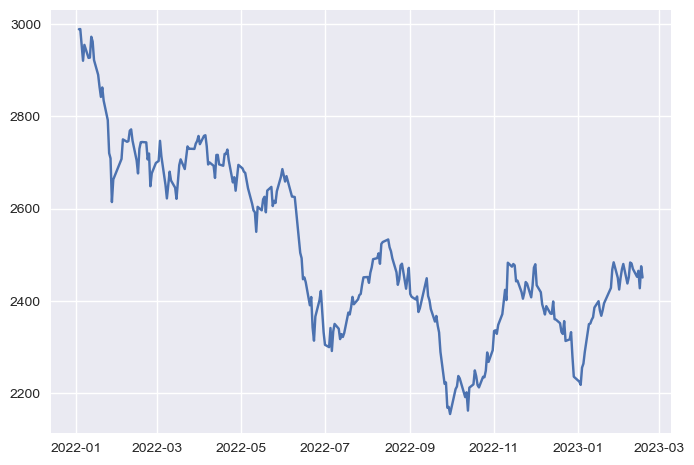

In [97]:
import matplotlib.pyplot as plt
price = pd.DataFrame(price.astype(float).values, columns = ['price'], index = price.index)
plt.plot(price) # plotting

In [98]:
price.head() # DataFrame

,price
Date,
2022-01-03,2988.77
2022-01-04,2989.24
2022-01-05,2953.97
2022-01-06,2920.53
2022-01-07,2954.89


### 범례 출력
- label로 라벨을 지정하고 legend( ) method를 통해서 범례를 출력할 수 있다

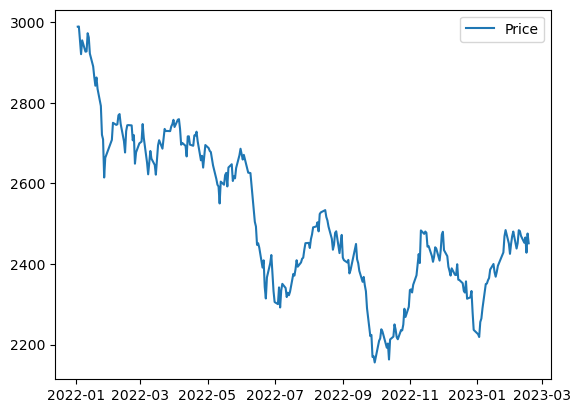

In [50]:
plt.plot(price, label = 'Price') # label 지정 가능
plt.legend() # 범례 출력

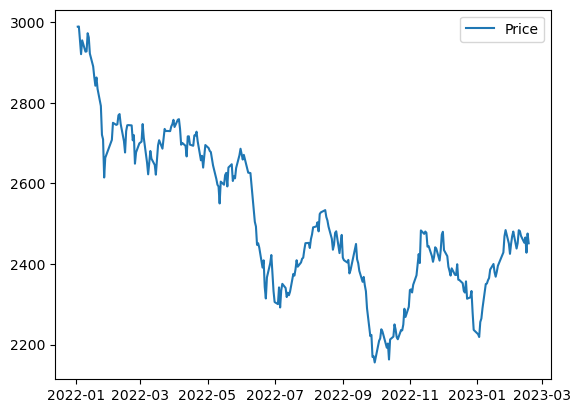

In [51]:
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') # loc argument를 통해 위치를 바꿀 수 있다

### Figure Style
- Matplotlib에서 표의 형태를 조절할 수 있는 몇가지 방법이 존재한다

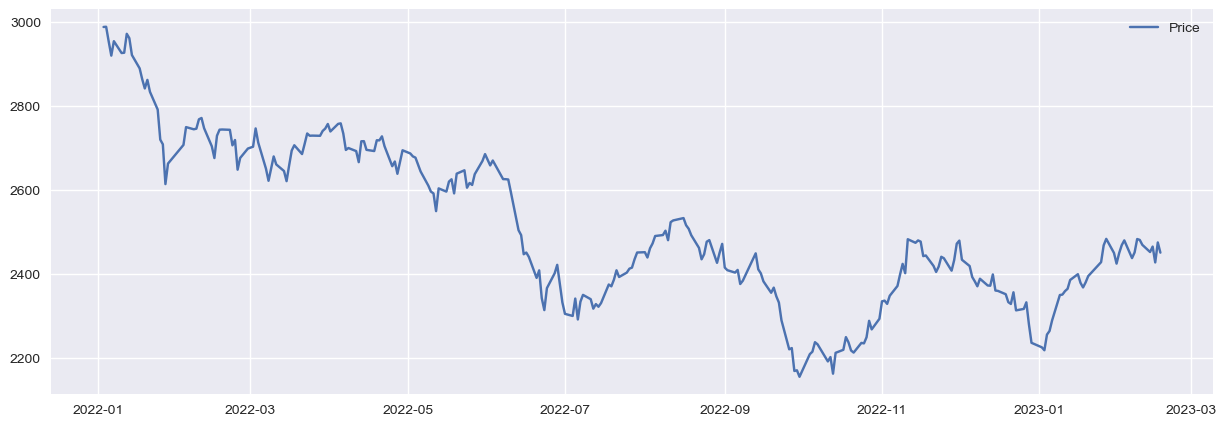

In [99]:
plt.style.use('seaborn') # plot 스타일 지정 가능, 구글링 해서 원하는 테마로 설정할 것
plt.figure(figsize = (15,5)) # plot size 지정 가능. figsize argument를 통해 사이즈를 조절할 수 있다
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') 

Text(0.5, 1.0, 'KOSPI Index')

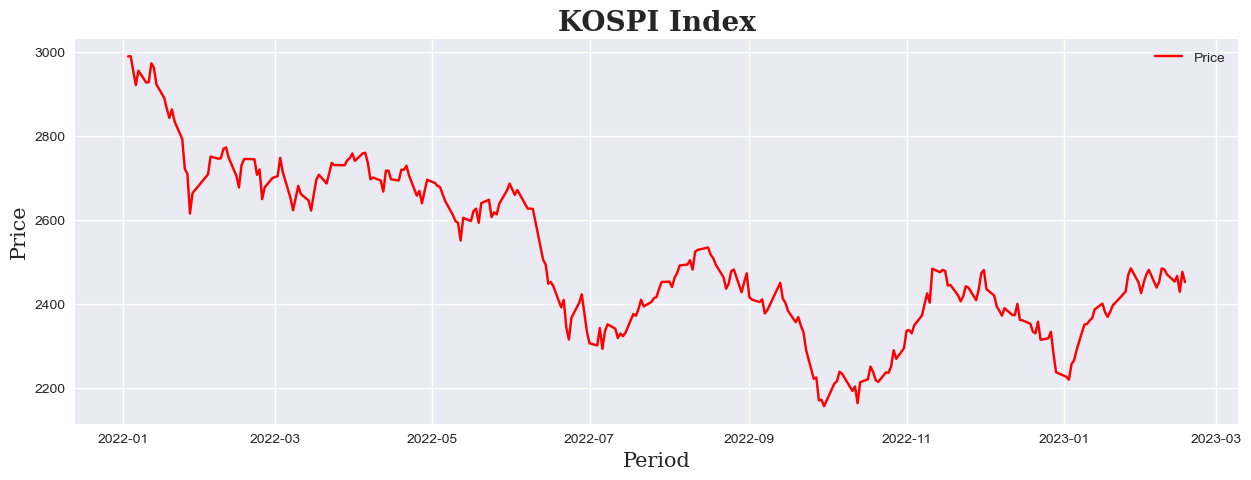

In [53]:
plt.style.use('seaborn') 
plt.figure(figsize = (15,5))
plt.plot(price, label = 'Price', color = 'red') # color argument를 통해 색상 변경 가능
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif') # label을 따로 붙일 수 있다
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif') # fontsize, fontfamily로 폰트 스타일 조정가능
plt.title('KOSPI Index', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif') # fontweight로 굵기 조절 

이외로도 matplotlib에서 외부 폰트를 직접 불러와 사용 가능하다(구글링 후 사용방법 참조)

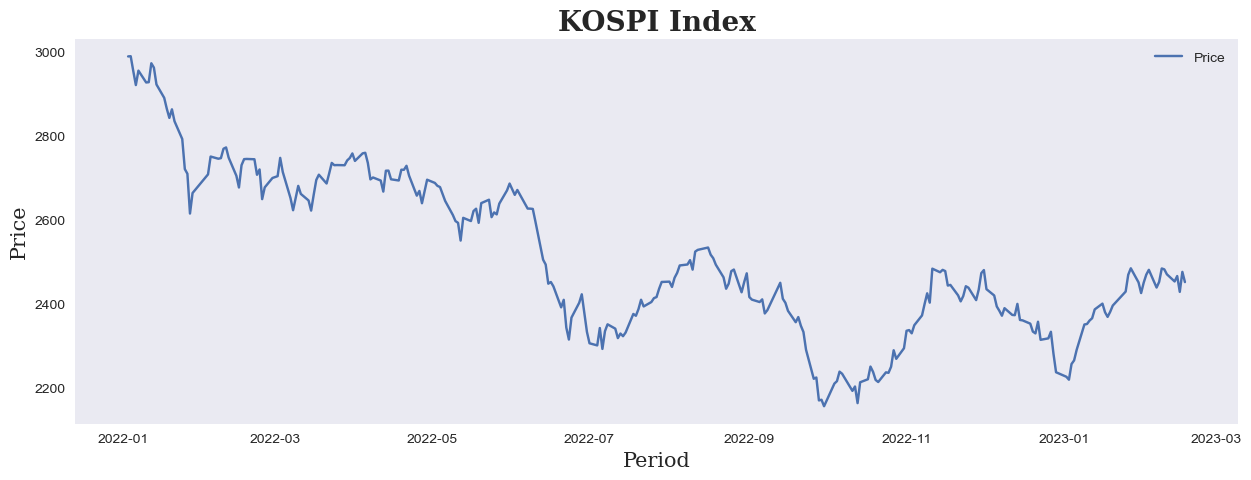

In [54]:
plt.style.use('seaborn') 
plt.figure(figsize = (15,5))
plt.grid(False) # grid 표시 설정가능
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif') 
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif') 
plt.title('KOSPI Index', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif')
plt.show() # show() method 사용시 여러개의 그래프를 한번에 표시 가능하다

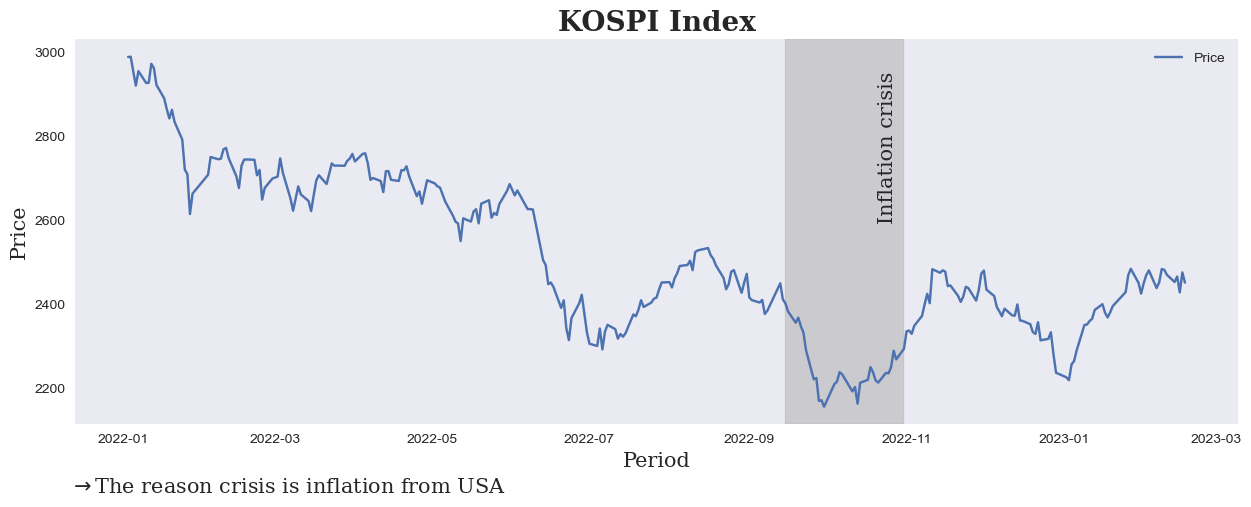

In [107]:
plt.style.use('seaborn') 
plt.figure(figsize = (15,5))
plt.grid(False) # grid 표시 설정가능
plt.plot(price, label = 'Price') 
plt.legend(loc = 'upper right') 
plt.xlabel('Period', fontsize = 15, fontfamily = 'Serif') 
plt.ylabel('Price', fontsize = 15, fontfamily = 'Serif') 
plt.axvspan('2022-09-15', '2022-10-31', color = 'gray', alpha = 0.3) # axvspan() : 정해진 구간동안 회색 음영 처리 가능
plt.title('KOSPI Index', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif')
plt.text(19286, 2600, 'Inflation crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
# rotation argument를 통해 개체를 회전시킬 수 있다
plt.text(18972, 1950 , r'$\rightarrow$The reason crisis is inflation from USA', ha = 'left', fontsize = 15, fontfamily = 'Serif')
# text method를 통해서 text를 집어넣을 수 있다
plt.show() # show() method 사용시 여러개의 그래프를 한번에 표시 가능하다

### Histogram

In [109]:
price

,price
Date,
2022-01-03,2988.77
2022-01-04,2989.24
2022-01-05,2953.97
2022-01-06,2920.53
2022-01-07,2954.89
...,...
2023-02-13,2452.70
2023-02-14,2465.64
2023-02-15,2427.90


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

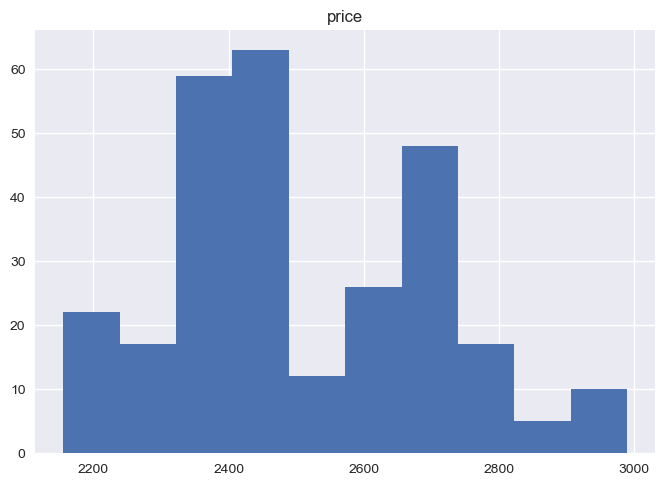

In [108]:
price.hist() # series에 hist() method 사용 시 히스토그램 출력

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

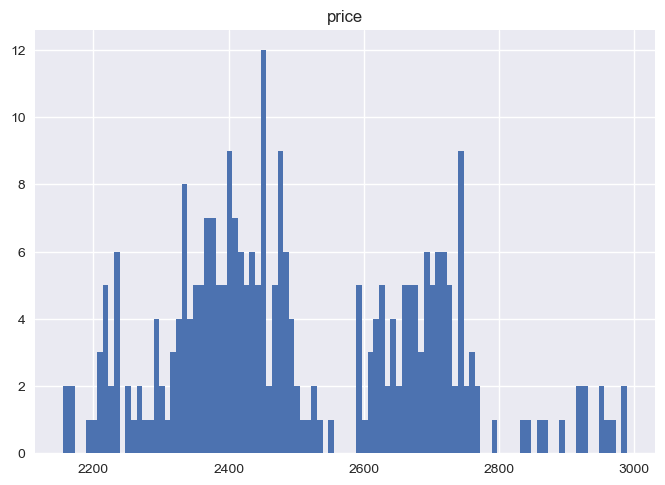

In [110]:
price.hist(bins = 100) # bins로 구간을 조절할 수 있다

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

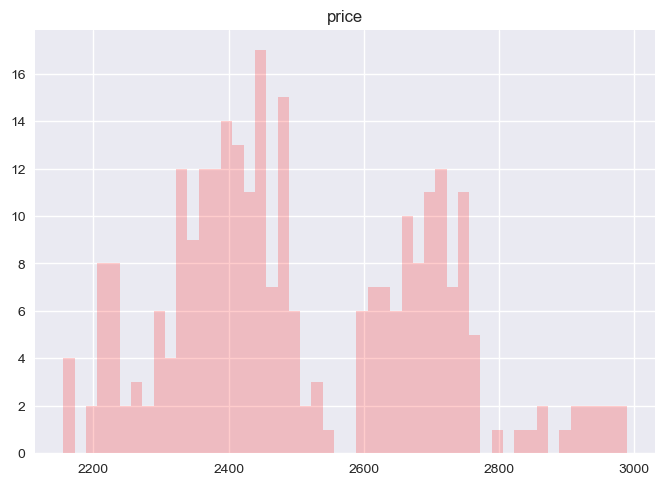

In [112]:
price.hist(facecolor = 'r', alpha = 0.2, bins = 50) # alpha(투명도)와 facecolor를 통해 색상 조절 가능

### imshow
- imshow함수를 이용해서 이미지 출력
- colorbar함수를 이용해 옆에 color bar를 출력할 수 있음

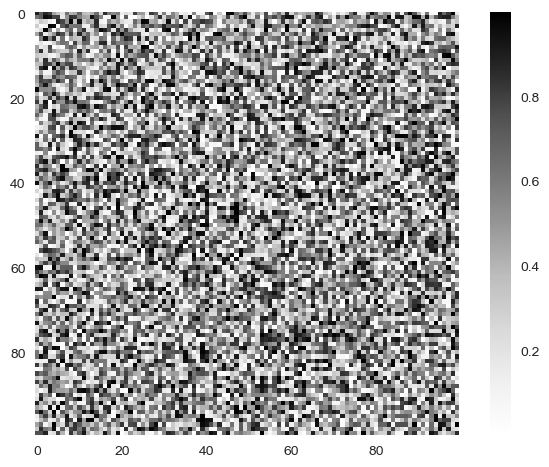

In [115]:
ao = np.random.random((100, 100))
plt.imshow(ao)
plt.colorbar()
plt.grid(False)

<class 'numpy.ndarray'>


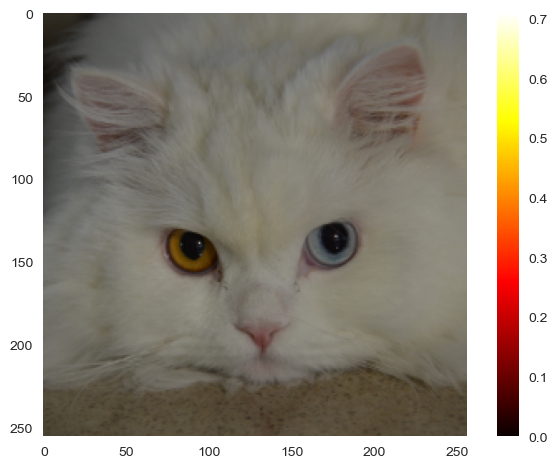

In [60]:
import matplotlib.image as mpimg
img = mpimg.imread('picture.png') # image를 numpy 형태로 저장
print(type(img))
plt.imshow(img)
plt.hot()
plt.grid(False)
plt.colorbar()
plt.show()

### Example 4.
- matplotlib를 활용해서 이미지만 출력해 보자

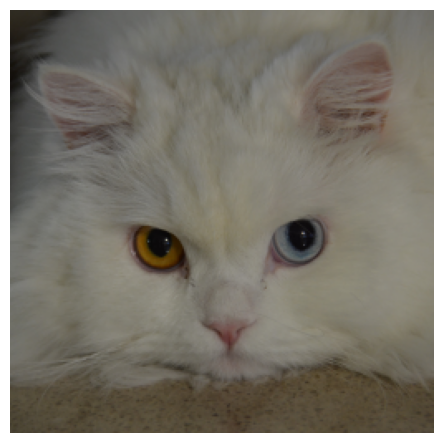

In [116]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('picture.png')
plt.imshow(img)
plt.hot()
plt.grid(False)
ax = plt.gca() # ax를 하나의 객체로 instance
ax.axes.xaxis.set_ticks([]) # tick 전부 제거
ax.axes.yaxis.set_ticks([])
plt.show()

### Assignment 1.
Korean_income.csv 파일을 읽어오고 다음 물음에 답하세요

#### Assignment 1-1.
Income에 대해서 np.log() 함수를 통해 로그로 변환한 column을 생성하고 이를 임의의 변수에 instance화 하세요

In [120]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

Income = pd.read_csv('Korean_income.csv', index_col = 0) # instance화

Income

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,income
77530,68460101,2005,1,3,1,2,1940,2,2,1,617,1,,460.000000
67016,59620101,2018,14,4,3,1,1939,5,1,2,,,9,1713.000000
38931,35960101,2012,8,2,3,1,1967,6,3,1,510,1,,2854.000000
72033,63870101,2011,7,4,5,1,1947,3,1,1,611,1,,4290.000000
21862,20620101,2017,13,4,2,1,1940,2,1,2,,,10,1608.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,42380101,2007,3,2,4,1,1965,5,1,2,941,5,,5860.000000
27886,26140101,2006,2,2,4,1,1972,5,1,1,512,2,,3744.000000
41941,38910101,2006,2,2,4,1,1941,2,1,2,,,7,2837.441215
61686,55380101,2018,14,7,1,2,1936,3,2,2,,,10,1697.000000


#### Assignment 1-2.
수업에서는 religion과 gender에 대해서만 One-Hot Encoding을 진행하였습니다. 이외에도 정성변수에는 지역(region)과 무직자 유형(reason_none_work)이 있습니다. 이 변수에 대해서 One-Hot Encoding을 수행하세요

In [122]:
Income = pd.get_dummies(Income, columns = ['religion','gender','region','reason_none_worker'])

Income

,id,year,wave,family_member,year_born,education_level,marriage,occupation,company_size,income,...,reason_none_worker_11,reason_none_worker_2,reason_none_worker_3,reason_none_worker_4,reason_none_worker_5,reason_none_worker_6,reason_none_worker_7,reason_none_worker_8,reason_none_worker_9,reason_none_worker_99
77530,68460101,2005,1,1,1940,2,2,617,1,460.000000,...,0,0,0,0,0,0,0,0,0,0
67016,59620101,2018,14,3,1939,5,1,,,1713.000000,...,0,0,0,0,0,0,0,0,1,0
38931,35960101,2012,8,3,1967,6,3,510,1,2854.000000,...,0,0,0,0,0,0,0,0,0,0
72033,63870101,2011,7,5,1947,3,1,611,1,4290.000000,...,0,0,0,0,0,0,0,0,0,0
21862,20620101,2017,13,2,1940,2,1,,,1608.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,42380101,2007,3,4,1965,5,1,941,5,5860.000000,...,0,0,0,0,0,0,0,0,0,0
27886,26140101,2006,2,4,1972,5,1,512,2,3744.000000,...,0,0,0,0,0,0,0,0,0,0
41941,38910101,2006,2,4,1941,2,1,,,2837.441215,...,0,0,0,0,0,0,1,0,0,0
61686,55380101,2018,14,1,1936,3,2,,,1697.000000,...,0,0,0,0,0,0,0,0,0,0


#### Assignment 1-3.
로그화된 log income에 대해서 bins = 100인 Histogram을 출력하세요
- 주의 : hist() method 사용을 그대로 하면 infinite numeric에 대한 오류가 출력됩니다. log income이 4 이상인 데이터에 대해서만 histogram을 출력하면 됩니다

In [123]:
Income['log_income'] = np.log(Income['income'])

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

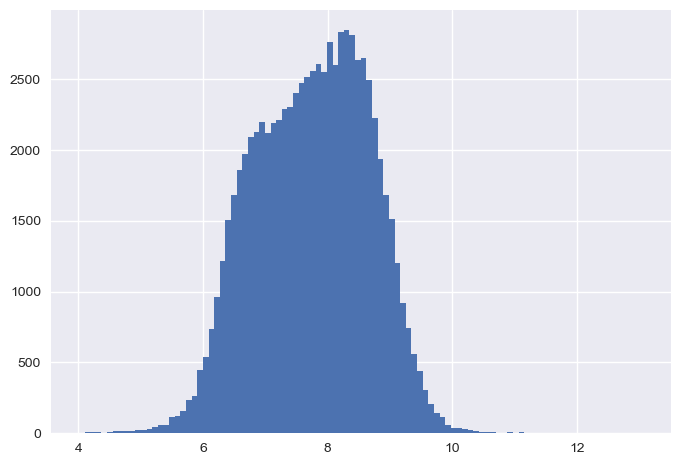

In [127]:
Income['log_income'][Income['log_income'] > 4].hist(bins = 100)

### Assignment 2.
pandas datareader를 통해 다음 물음에 답하세요

In [62]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2002, 1, 1)
end = datetime.datetime(2023, 2, 17)
df = wb.DataReader("KOSPI", "naver", start, end)

#### Assignment 2-1.
2002년 1월 1일부터 2023년 2월 17일까지의 KOSPI의 종가 데이터를 df라는 변수에 저장하였습니다. df의 상위,하위 5개 행을 출력하고 데이터를 확인한 뒤 종가를 matplotlib를 활용해 시각화 하세요
- 상위 5개 데이터 출력 : head( ) method
- 하위 5개 데이터 출력 : tail( ) method

#### Assignment 2-2.
- 시계열 데이터의 안정성을 위해 로그 차분 데이터를 사용합니다. 로그 차분은 다음과 같이 계산됩니다

$$r_t = \ln{P_t} - \ln{P_{t-1}}$$

- $r_t$는 수익률, 즉 로그 차분이며, $P$는 가격 데이터입니다. t는 어느 한 기간을 의미합니다.

Series를 활용해 로그 차분 데이터를 생성한 뒤, matplotlib를 활용해 수익률 데이터를 시각화 하세요

#### Assignment 2-3.
2000년대 이후 큰 규모의 경제 위기는 다음과 같이 있습니다

- 2008년 금융위기 : 리먼브라더스 파산에 따른 여파로 발생한 전세계적 경제 위기
- 2012년 유럽 재정위기 : 그리스 채무 불이행으로 촉발된 경제 위기
- 2020년 COVID-19 경제위기 : 코로나 사태로 촉발된 공급체인문제와 유동성위기

각 경제위기의 기간을 직접 지정한 뒤, axvspan() 을 통해 음영처리한 후, text() method를 사용해 부연설명을 첨가하세요. 단, 한국어 폰트는 제대로 출력되지 않으므로 영어를 통해 적으셔야 합니다.
- 종가 데이터를 시각화한 차트와 수익률 데이터를 시각화한 차트 모두에 표시하시길 바랍니다